<a href="https://colab.research.google.com/github/DivyaSadhana/PV-2024-Machine-Learning/blob/main/Pharmacovigilance_2024_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Establish connection between My Drive and Google colab

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [122]:
# Import File

import pandas as pd
df = pd.read_excel(r'/content/gdrive/My Drive/2023_Master_Tracker.xlsx')
df

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,2547730,2023-01-01,DE,53.00,NaN,NaN,F,NaN,The adverse event is that the patient went int...,NaN,...,Coma,Computerised tomogram,Exposure to SARS-CoV-2,COVID19,JANSSEN,1808982,UNK,SYR,AR,COVID19 (COVID19 (JANSSEN))
1,2547730,2023-01-01,DE,53.00,NaN,NaN,F,NaN,The adverse event is that the patient went int...,NaN,...,Laboratory test,Magnetic resonance imaging,SARS-CoV-2 antibody test negative,COVID19,JANSSEN,1808982,UNK,SYR,AR,COVID19 (COVID19 (JANSSEN))
2,2547730,2023-01-01,DE,53.00,NaN,NaN,F,NaN,The adverse event is that the patient went int...,NaN,...,X-ray,NaN,NaN,COVID19,JANSSEN,1808982,UNK,SYR,AR,COVID19 (COVID19 (JANSSEN))
3,2547731,2023-01-01,MA,6.00,6.0,NaN,M,NaN,Error: Incorrect Reconstitution-,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,GK1657,3,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
4,2547732,2023-01-01,MA,38.00,38.0,NaN,F,NaN,Error: Patient Accidentally Stuck by Needle-,NaN,...,NaN,NaN,NaN,COVID19-2,MODERNA,141H22A,4,IM,LA,COVID19 (COVID19 (MODERNA BIVALENT))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155172,2717538,2023-11-24,CO,NaN,NaN,NaN,U,NaN,breast cancer; This spontaneous case was repor...,NaN,...,NaN,NaN,NaN,COVID19,MODERNA,NaN,UNK,NaN,NaN,COVID19 (COVID19 (MODERNA))
155173,2717539,2023-11-24,NY,71.00,NaN,NaN,F,NaN,I could barely lift my arm/ could barely move;...,NaN,...,Fatigue,Gait inability,Lymphadenitis,COVID19,MODERNA,NaN,6,NaN,NaN,COVID19 (COVID19 (MODERNA))
155174,2717539,2023-11-24,NY,71.00,NaN,NaN,F,NaN,I could barely lift my arm/ could barely move;...,NaN,...,Pain in extremity,NaN,NaN,COVID19,MODERNA,NaN,6,NaN,NaN,COVID19 (COVID19 (MODERNA))
155175,2624988,2023-05-02,WA,1.58,1.0,0.7,M,NaN,"Patient received monovalent vaccine on Friday,...",NaN,...,NaN,NaN,NaN,COVID19,MODERNA,AS1417B,1,IM,LL,COVID19 (COVID19 (MODERNA))


In [123]:
# Remove rows of the patients whose side effect onset data (NUMDAYS) is not available or null
df = df.dropna(subset=['NUMDAYS'])
df

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
3,2547731,2023-01-01,MA,6.00,6.0,NaN,M,NaN,Error: Incorrect Reconstitution-,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,GK1657,3,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
4,2547732,2023-01-01,MA,38.00,38.0,NaN,F,NaN,Error: Patient Accidentally Stuck by Needle-,NaN,...,NaN,NaN,NaN,COVID19-2,MODERNA,141H22A,4,IM,LA,COVID19 (COVID19 (MODERNA BIVALENT))
5,2547733,2023-01-01,CA,63.00,63.0,NaN,M,NaN,Error: Dose in Series Given Too Early-,NaN,...,NaN,NaN,NaN,COVID19,MODERNA,042h22a,1,IM,LA,COVID19 (COVID19 (MODERNA))
6,2547734,2023-01-01,IL,30.00,30.0,NaN,F,NaN,Systemic: EYE TWITCHING-Medium,NaN,...,NaN,NaN,NaN,TDAP,GLAXOSMITHKLINE BIOLOGICALS,KP547,1,IM,LA,TDAP (BOOSTRIX)
7,2547735,2023-01-01,LA,38.00,38.0,NaN,F,NaN,"Systemic: Confusion-Mild, Systemic: Fainting /...",NaN,...,Dysarthria,Syncope,Unresponsive to stimuli,COVID19-2,PFIZER\BIONTECH,GJ3274,NaN,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH BIVALENT))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155169,2717532,2023-11-24,AL,30.00,30.0,NaN,F,NaN,she received Fluzone Quadrivalent and is curre...,NaN,...,NaN,NaN,NaN,FLU4,SANOFI PASTEUR,UT8144NA,UNK,OT,NaN,INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT)
155173,2717539,2023-11-24,NY,71.00,NaN,NaN,F,NaN,I could barely lift my arm/ could barely move;...,NaN,...,Fatigue,Gait inability,Lymphadenitis,COVID19,MODERNA,NaN,6,NaN,NaN,COVID19 (COVID19 (MODERNA))
155174,2717539,2023-11-24,NY,71.00,NaN,NaN,F,NaN,I could barely lift my arm/ could barely move;...,NaN,...,Pain in extremity,NaN,NaN,COVID19,MODERNA,NaN,6,NaN,NaN,COVID19 (COVID19 (MODERNA))
155175,2624988,2023-05-02,WA,1.58,1.0,0.7,M,NaN,"Patient received monovalent vaccine on Friday,...",NaN,...,NaN,NaN,NaN,COVID19,MODERNA,AS1417B,1,IM,LL,COVID19 (COVID19 (MODERNA))


In [124]:
display(df.dtypes)

VAERS_ID                    int64
RECVDATE           datetime64[ns]
STATE                      object
AGE_YRS                   float64
CAGE_YR                   float64
CAGE_MO                   float64
SEX                        object
RPT_DATE                   object
SYMPTOM_TEXT               object
DIED                       object
DATEDIED                   object
L_THREAT                   object
ER_VISIT                   object
HOSPITAL                   object
HOSPDAYS                  float64
X_STAY                     object
DISABLE                    object
RECOVD                     object
VAX_DATE           datetime64[ns]
ONSET_DATE         datetime64[ns]
NUMDAYS                   float64
LAB_DATA                   object
V_ADMINBY                  object
V_FUNDBY                   object
OTHER_MEDS                 object
CUR_ILL                    object
HISTORY                    object
PRIOR_VAX                  object
SPLTTYPE                   object
FORM_VERS     

In [125]:
# Convert data type of NUMDAYS to Integer from Float
df = df.astype({"NUMDAYS": 'int'})
display(df.dtypes)

VAERS_ID                    int64
RECVDATE           datetime64[ns]
STATE                      object
AGE_YRS                   float64
CAGE_YR                   float64
CAGE_MO                   float64
SEX                        object
RPT_DATE                   object
SYMPTOM_TEXT               object
DIED                       object
DATEDIED                   object
L_THREAT                   object
ER_VISIT                   object
HOSPITAL                   object
HOSPDAYS                  float64
X_STAY                     object
DISABLE                    object
RECOVD                     object
VAX_DATE           datetime64[ns]
ONSET_DATE         datetime64[ns]
NUMDAYS                     int64
LAB_DATA                   object
V_ADMINBY                  object
V_FUNDBY                   object
OTHER_MEDS                 object
CUR_ILL                    object
HISTORY                    object
PRIOR_VAX                  object
SPLTTYPE                   object
FORM_VERS     

In [126]:
# Calculate Mean for NUMDAYS
mean_value = df['NUMDAYS'].mean()


# Calculate Median for NUMDAYS
median_value = df['NUMDAYS'].median()


# Calculate Mode for NUMDAYS
mode_value = df['NUMDAYS'].mode()

# Calculate Maximum Value
Maximum_Value = df['NUMDAYS'].max()

#Calculate Minimum Value
Minimum_Value = df['NUMDAYS'].min()

# Generate the Results to compare Mean, Median, Mode values

print(f"The mean of the NUMDAYS column is {mean_value}.")
print(f"The median of the NUMDAYS column is {median_value}.")
print(f"The mode of the NUMDAYS column is {mode_value}.")
print(f"The Maximum value of the NUMDAYS column is {Maximum_Value}.")
print(f"The Minimum value of the NUMDAYS column is {Minimum_Value}.")


The mean of the NUMDAYS column is 124.1281209751253.
The median of the NUMDAYS column is 2.0.
The mode of the NUMDAYS column is 0    0
Name: NUMDAYS, dtype: int64.
The Maximum value of the NUMDAYS column is 66108.
The Minimum value of the NUMDAYS column is 0.


In [127]:
Removal = df[ (df['NUMDAYS'] >= 31)].index
df.drop(Removal , inplace=True)
df

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
3,2547731,2023-01-01,MA,6.00,6.0,NaN,M,NaN,Error: Incorrect Reconstitution-,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,GK1657,3,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
4,2547732,2023-01-01,MA,38.00,38.0,NaN,F,NaN,Error: Patient Accidentally Stuck by Needle-,NaN,...,NaN,NaN,NaN,COVID19-2,MODERNA,141H22A,4,IM,LA,COVID19 (COVID19 (MODERNA BIVALENT))
5,2547733,2023-01-01,CA,63.00,63.0,NaN,M,NaN,Error: Dose in Series Given Too Early-,NaN,...,NaN,NaN,NaN,COVID19,MODERNA,042h22a,1,IM,LA,COVID19 (COVID19 (MODERNA))
6,2547734,2023-01-01,IL,30.00,30.0,NaN,F,NaN,Systemic: EYE TWITCHING-Medium,NaN,...,NaN,NaN,NaN,TDAP,GLAXOSMITHKLINE BIOLOGICALS,KP547,1,IM,LA,TDAP (BOOSTRIX)
7,2547735,2023-01-01,LA,38.00,38.0,NaN,F,NaN,"Systemic: Confusion-Mild, Systemic: Fainting /...",NaN,...,Dysarthria,Syncope,Unresponsive to stimuli,COVID19-2,PFIZER\BIONTECH,GJ3274,NaN,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH BIVALENT))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155169,2717532,2023-11-24,AL,30.00,30.0,NaN,F,NaN,she received Fluzone Quadrivalent and is curre...,NaN,...,NaN,NaN,NaN,FLU4,SANOFI PASTEUR,UT8144NA,UNK,OT,NaN,INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT)
155173,2717539,2023-11-24,NY,71.00,NaN,NaN,F,NaN,I could barely lift my arm/ could barely move;...,NaN,...,Fatigue,Gait inability,Lymphadenitis,COVID19,MODERNA,NaN,6,NaN,NaN,COVID19 (COVID19 (MODERNA))
155174,2717539,2023-11-24,NY,71.00,NaN,NaN,F,NaN,I could barely lift my arm/ could barely move;...,NaN,...,Pain in extremity,NaN,NaN,COVID19,MODERNA,NaN,6,NaN,NaN,COVID19 (COVID19 (MODERNA))
155175,2624988,2023-05-02,WA,1.58,1.0,0.7,M,NaN,"Patient received monovalent vaccine on Friday,...",NaN,...,NaN,NaN,NaN,COVID19,MODERNA,AS1417B,1,IM,LL,COVID19 (COVID19 (MODERNA))


In [128]:
# Calculate Mean, Median, Mode, Minimum, Maximum values to check execution of above logic
# Calculate Mean for NUMDAYS
Mean = df['NUMDAYS'].mean()


# Calculate Median for NUMDAYS
Median = df['NUMDAYS'].median()


# Calculate Mode for NUMDAYS
Mode = df['NUMDAYS'].mode()

# Calculate Maximum Value
Maximum = df['NUMDAYS'].max()

#Calculate Minimum Value
Minimum = df['NUMDAYS'].min()

# Generate the Results to compare Mean, Median, Mode values

print(f"The mean of the NUMDAYS column is {Mean}.")
print(f"The median of the NUMDAYS column is {Median}.")
print(f"The mode of the NUMDAYS column is {Mode}.")
print(f"The Maximum value of the NUMDAYS column is {Maximum}.")
print(f"The Minimum value of the NUMDAYS column is {Minimum}.")

The mean of the NUMDAYS column is 2.289135008043559.
The median of the NUMDAYS column is 0.0.
The mode of the NUMDAYS column is 0    0
Name: NUMDAYS, dtype: int64.
The Maximum value of the NUMDAYS column is 30.
The Minimum value of the NUMDAYS column is 0.


In [130]:
# Remove null values of 'Age' column as the number of rows are not larger .
# Mean should be used for normal distributed data if the missing values are higher than available data.
# Median should be used if data is skewed towards left or right and missing values are high
df = df.dropna(subset=['AGE_YRS'])
df

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM3,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
3,2547731,2023-01-01,MA,6.00,6.0,NaN,M,NaN,Error: Incorrect Reconstitution-,NaN,...,NaN,NaN,NaN,COVID19,PFIZER\BIONTECH,GK1657,3,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
4,2547732,2023-01-01,MA,38.00,38.0,NaN,F,NaN,Error: Patient Accidentally Stuck by Needle-,NaN,...,NaN,NaN,NaN,COVID19-2,MODERNA,141H22A,4,IM,LA,COVID19 (COVID19 (MODERNA BIVALENT))
5,2547733,2023-01-01,CA,63.00,63.0,NaN,M,NaN,Error: Dose in Series Given Too Early-,NaN,...,NaN,NaN,NaN,COVID19,MODERNA,042h22a,1,IM,LA,COVID19 (COVID19 (MODERNA))
6,2547734,2023-01-01,IL,30.00,30.0,NaN,F,NaN,Systemic: EYE TWITCHING-Medium,NaN,...,NaN,NaN,NaN,TDAP,GLAXOSMITHKLINE BIOLOGICALS,KP547,1,IM,LA,TDAP (BOOSTRIX)
7,2547735,2023-01-01,LA,38.00,38.0,NaN,F,NaN,"Systemic: Confusion-Mild, Systemic: Fainting /...",NaN,...,Dysarthria,Syncope,Unresponsive to stimuli,COVID19-2,PFIZER\BIONTECH,GJ3274,NaN,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH BIVALENT))
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155169,2717532,2023-11-24,AL,30.00,30.0,NaN,F,NaN,she received Fluzone Quadrivalent and is curre...,NaN,...,NaN,NaN,NaN,FLU4,SANOFI PASTEUR,UT8144NA,UNK,OT,NaN,INFLUENZA (SEASONAL) (FLUZONE QUADRIVALENT)
155173,2717539,2023-11-24,NY,71.00,NaN,NaN,F,NaN,I could barely lift my arm/ could barely move;...,NaN,...,Fatigue,Gait inability,Lymphadenitis,COVID19,MODERNA,NaN,6,NaN,NaN,COVID19 (COVID19 (MODERNA))
155174,2717539,2023-11-24,NY,71.00,NaN,NaN,F,NaN,I could barely lift my arm/ could barely move;...,NaN,...,Pain in extremity,NaN,NaN,COVID19,MODERNA,NaN,6,NaN,NaN,COVID19 (COVID19 (MODERNA))
155175,2624988,2023-05-02,WA,1.58,1.0,0.7,M,NaN,"Patient received monovalent vaccine on Friday,...",NaN,...,NaN,NaN,NaN,COVID19,MODERNA,AS1417B,1,IM,LL,COVID19 (COVID19 (MODERNA))


In [ ]:
# Convert Age Data Type from Float to Integer

In [131]:
df = df.astype({"AGE_YRS": 'int'})
display(df.dtypes)

VAERS_ID                    int64
RECVDATE           datetime64[ns]
STATE                      object
AGE_YRS                     int64
CAGE_YR                   float64
CAGE_MO                   float64
SEX                        object
RPT_DATE                   object
SYMPTOM_TEXT               object
DIED                       object
DATEDIED                   object
L_THREAT                   object
ER_VISIT                   object
HOSPITAL                   object
HOSPDAYS                  float64
X_STAY                     object
DISABLE                    object
RECOVD                     object
VAX_DATE           datetime64[ns]
ONSET_DATE         datetime64[ns]
NUMDAYS                     int64
LAB_DATA                   object
V_ADMINBY                  object
V_FUNDBY                   object
OTHER_MEDS                 object
CUR_ILL                    object
HISTORY                    object
PRIOR_VAX                  object
SPLTTYPE                   object
FORM_VERS     

# Change data type for 'Died' column : Replace 'Y' with 1 and Fill/Rename 'Null/Missing values' with 0

In [140]:
DIED = df['DIED'].fillna(0)
print(DIED)

3         0
4         0
5         0
6         0
7         0
         ..
155169    0
155173    0
155174    0
155175    0
155176    0
Name: DIED, Length: 75781, dtype: object


In [141]:
df['DIED']= DIED
df.head(2)

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM4,SYMPTOM5,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME,AGE
3,2547731,2023-01-01,MA,6,6.0,NaN,M,NaN,Error: Incorrect Reconstitution-,0,...,NaN,NaN,COVID19,PFIZER\BIONTECH,GK1657,3,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH)),6.0
4,2547732,2023-01-01,MA,38,38.0,NaN,F,NaN,Error: Patient Accidentally Stuck by Needle-,0,...,NaN,NaN,COVID19-2,MODERNA,141H22A,4,IM,LA,COVID19 (COVID19 (MODERNA BIVALENT)),38.0


In [142]:
df['DIED'] = df['DIED'].replace('Y', 1)
print(df['DIED'])

3         0
4         0
5         0
6         0
7         0
         ..
155169    0
155173    0
155174    0
155175    0
155176    0
Name: DIED, Length: 75781, dtype: int64


# Change data type for 'Life_Threat' Column : Replace 'Y' with 1 and Fill/Rename 'Null/Missing values' with 0

In [143]:
df['L_THREAT'] = df['L_THREAT'].replace('Y', 1)
print(df['L_THREAT'])

3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
          ..
155169   NaN
155173   NaN
155174   NaN
155175   NaN
155176   NaN
Name: L_THREAT, Length: 75781, dtype: float64


In [145]:
df['L_THREAT'] = df['L_THREAT'].fillna(0)
print(df['L_THREAT'])

3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
         ... 
155169    0.0
155173    0.0
155174    0.0
155175    0.0
155176    0.0
Name: L_THREAT, Length: 75781, dtype: float64


In [146]:
df = df.astype({"L_THREAT": 'int'})
display(df.dtypes)

VAERS_ID                    int64
RECVDATE           datetime64[ns]
STATE                      object
AGE_YRS                     int64
CAGE_YR                   float64
CAGE_MO                   float64
SEX                        object
RPT_DATE                   object
SYMPTOM_TEXT               object
DIED                        int64
DATEDIED                   object
L_THREAT                    int64
ER_VISIT                   object
HOSPITAL                   object
HOSPDAYS                  float64
X_STAY                     object
DISABLE                    object
RECOVD                     object
VAX_DATE           datetime64[ns]
ONSET_DATE         datetime64[ns]
NUMDAYS                     int64
LAB_DATA                   object
V_ADMINBY                  object
V_FUNDBY                   object
OTHER_MEDS                 object
CUR_ILL                    object
HISTORY                    object
PRIOR_VAX                  object
SPLTTYPE                   object
FORM_VERS     

# Change data type for 'Hospital' column : Replace 'Y' with 1 and Fill/Rename 'Null/Missing values' with 0

In [147]:
df['HOSPITAL'] = df['HOSPITAL'].replace('Y', 1)
print(df['HOSPITAL'])

3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
          ..
155169   NaN
155173   NaN
155174   NaN
155175   NaN
155176   NaN
Name: HOSPITAL, Length: 75781, dtype: float64


In [153]:
df['HOSPITAL'] = df['HOSPITAL'].fillna(0)
print(df['HOSPITAL'])

3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
         ... 
155169    0.0
155173    0.0
155174    0.0
155175    0.0
155176    0.0
Name: HOSPITAL, Length: 75781, dtype: float64


In [154]:
df = df.astype({"HOSPITAL": 'int'})
display(df.dtypes)

VAERS_ID                    int64
RECVDATE           datetime64[ns]
STATE                      object
AGE_YRS                     int64
CAGE_YR                   float64
CAGE_MO                   float64
SEX                        object
RPT_DATE                   object
SYMPTOM_TEXT               object
DIED                        int64
DATEDIED                   object
L_THREAT                    int64
ER_VISIT                   object
HOSPITAL                    int64
HOSPDAYS                  float64
X_STAY                     object
DISABLE                     int64
RECOVD                     object
VAX_DATE           datetime64[ns]
ONSET_DATE         datetime64[ns]
NUMDAYS                     int64
LAB_DATA                   object
V_ADMINBY                  object
V_FUNDBY                   object
OTHER_MEDS                 object
CUR_ILL                    object
HISTORY                    object
PRIOR_VAX                  object
SPLTTYPE                   object
FORM_VERS     

# Change data type for'Disability' Column: Replace 'Y' with 1 and Fill/Rename 'Null/Missing values' with 0

In [149]:
df['DISABLE'] = df['DISABLE'].replace('Y', 1)
print(df['DISABLE'])

3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
          ..
155169   NaN
155173   NaN
155174   NaN
155175   NaN
155176   NaN
Name: DISABLE, Length: 75781, dtype: float64


In [150]:

df['DISABLE'] = df['DISABLE'].fillna(0)
print(df['DISABLE'])

3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
         ... 
155169    0.0
155173    0.0
155174    0.0
155175    0.0
155176    0.0
Name: DISABLE, Length: 75781, dtype: float64


In [151]:
df = df.astype({"DISABLE": 'int'})
display(df.dtypes)

VAERS_ID                    int64
RECVDATE           datetime64[ns]
STATE                      object
AGE_YRS                     int64
CAGE_YR                   float64
CAGE_MO                   float64
SEX                        object
RPT_DATE                   object
SYMPTOM_TEXT               object
DIED                        int64
DATEDIED                   object
L_THREAT                    int64
ER_VISIT                   object
HOSPITAL                  float64
HOSPDAYS                  float64
X_STAY                     object
DISABLE                     int64
RECOVD                     object
VAX_DATE           datetime64[ns]
ONSET_DATE         datetime64[ns]
NUMDAYS                     int64
LAB_DATA                   object
V_ADMINBY                  object
V_FUNDBY                   object
OTHER_MEDS                 object
CUR_ILL                    object
HISTORY                    object
PRIOR_VAX                  object
SPLTTYPE                   object
FORM_VERS     

# Pick only required columns by excluding unwanted columns

In [155]:
Required_Data = df[['AGE_YRS','SEX','DIED','HOSPITAL','L_THREAT','DISABLE','NUMDAYS','VAX_MANU','VAX_ROUTE','VAX_SITE']]
Required_Data.head()

,AGE_YRS,SEX,DIED,HOSPITAL,L_THREAT,DISABLE,NUMDAYS,VAX_MANU,VAX_ROUTE,VAX_SITE
3,6,M,0,0,0,0,0,PFIZER\BIONTECH,IM,LA
4,38,F,0,0,0,0,0,MODERNA,IM,LA
5,63,M,0,0,0,0,0,MODERNA,IM,LA
6,30,F,0,0,0,0,0,GLAXOSMITHKLINE BIOLOGICALS,IM,LA
7,38,F,0,0,0,0,0,PFIZER\BIONTECH,IM,LA


#Perform Encoding, remove null values to execute correlation

df.corr() computes the pairwise correlation of columns, excluding NA/null values. The resulting correlation matrix is a DataFrame where each cell represents the correlation coefficient between two variables.

# Perform Correlation for Feature Selection

<ipython-input-156-f115fd784441>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Required_Data.corr()


           AGE_YRS      DIED  HOSPITAL  L_THREAT   DISABLE   NUMDAYS
AGE_YRS   1.000000  0.068411  0.133026  0.047200  0.067781  0.143557
DIED      0.068411  1.000000  0.112579  0.067423  0.006042  0.076783
HOSPITAL  0.133026  0.112579  1.000000  0.402984  0.212870  0.320035
L_THREAT  0.047200  0.067423  0.402984  1.000000  0.246601  0.123703
DISABLE   0.067781  0.006042  0.212870  0.246601  1.000000  0.175020
NUMDAYS   0.143557  0.076783  0.320035  0.123703  0.175020  1.000000


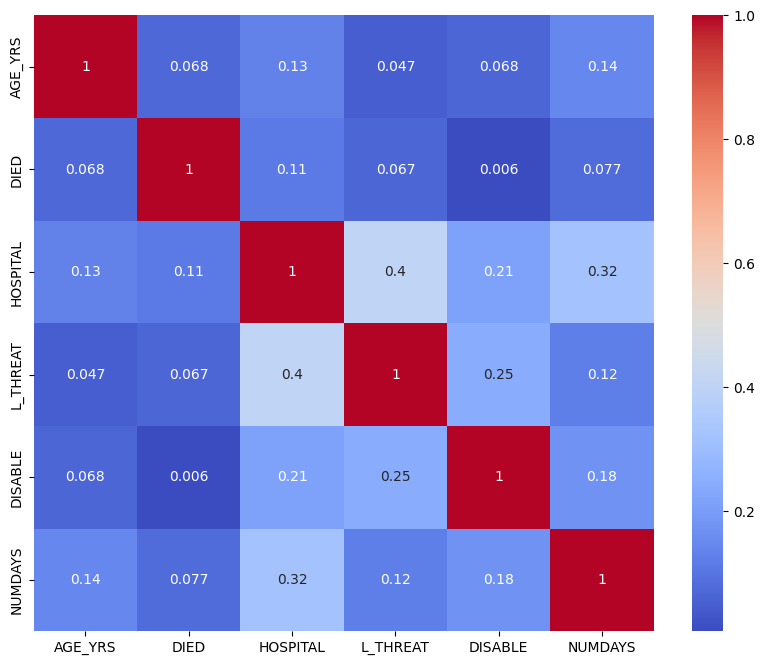

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming Required_Data is your DataFrame
correlation_matrix = Required_Data.corr()

# Display the correlation matrix
print(correlation_matrix)

# If you want to visualize this correlation matrix, you can use seaborn's heatmap function:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

The output you’re seeing is a correlation matrix. It’s a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two variables have high correlation, it means they might have a strong relationship and change together.

Here’s what each value in your matrix means:

1.000000: A diagonal line from the top left to the bottom right is filled with 1.00, which indicates that a variable always perfectly correlates with itself.
Positive values: For example, AGE_YRS and NUMDAYS have a correlation of 0.143557. This means that there’s a positive correlation between these two variables. As AGE_YRS increases, NUMDAYS also increases.
Negative values: If you had any negative values, it would indicate a negative correlation i.e., one variable increases as the other decreases.
The FutureWarning is a warning message from pandas library about a future change in the default behavior of the corr function. Currently, the numeric_only parameter defaults to None, but in a future version of pandas, it will default to False. To avoid this warning, you can explicitly set numeric_only=True or numeric_only=False when calling the corr function. For example: correlation_matrix = Required_Data.corr(numeric_only=True). This will silence the warning.

Please note that correlation does not imply causation. Just because two variables correlate does not mean that one causes the other to change. It’s also important to remember that correlation measures linear relationships and might miss out on other types of relationships.

In [159]:
# Mutual Information
from sklearn.feature_selection import mutual_info_classif

# Assuming 'DIED' is your target variable
X = Required_Data.drop('DIED', axis=1)
Y = Required_Data['DIED']

# Calculate mutual information
mutual_info = mutual_info_classif(X, y)

# Create a DataFrame for easy visualization
mi_df = pd.DataFrame(mutual_info, index=X.columns, columns=['mutual_info'])
print(mi_Required_Data.sort_values(by='mutual_info', ascending=False))


ValueError: ignored

In [158]:
# Chi-Square Test
from sklearn.feature_selection import chi2

# Note: chi2 requires all input data to be non-negative
# Assuming 'DIED' is your target variable and all features are non-negative
x = Required_Data.drop('DIED', axis=1)
y = Required_Data['DIED']

# Calculate chi-squared stats
chi_scores = chi2(X, y)

# Create a DataFrame for easy visualization
chi2_Required_Data = pd.DataFrame(chi_scores, index=X.columns, columns=['chi2_score', 'p_value'])
print(chi2_Required_Data.sort_values(by='chi2_score', ascending=False))


ValueError: ignored

In [118]:
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming 'DIED' is your target variable
X = df.drop('DIED', axis=1)
y = df['DIED']

# Initialize an estimator
estimator = LogisticRegression()

# Initialize RFE
selector = RFE(estimator, n_features_to_select=5, step=1)

# Fit RFE
selector = selector.fit(X, y)

# Get the selected features
selected_features = X.columns[selector.support_]
print(selected_features)


ValueError: ignored